In [37]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
pd.options.display.max_columns = 999
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import warnings
warnings.filterwarnings('ignore')
import datetime as datetime

In [115]:
data = pd.read_csv('final.csv')

In [116]:
data.columns

Index(['Month',
       'GenCalifornia...all.fuels..utility.scale..thousand.megawatthours',
       'GenCalifornia...coal.thousand.megawatthours',
       'GenCalifornia...petroleum.liquids.thousand.megawatthours',
       'GenCalifornia...petroleum.coke.thousand.megawatthours',
       'GenCalifornia...natural.gas.thousand.megawatthours',
       'GenCalifornia...other.gases.thousand.megawatthours',
       'GenCalifornia...nuclear.thousand.megawatthours',
       'GenCalifornia...conventional.hydroelectric.thousand.megawatthours',
       'GenCalifornia...other.renewables.thousand.megawatthours',
       'GenCalifornia...hydro.electric.pumped.storage.thousand.megawatthours',
       'GenCalifornia...other.thousand.megawatthours',
       'GenCalifornia..Geothermal.electricity.Total',
       'GenCalifornia..Geothermal.electric.utility',
       'GenCalifornia..Independent.Power.producers', 'GDP', 'Av.Temp',
       'Av.Daily.Max', 'Av.Rel.Humid',
       'PrCalifornia...all.sectors.cents.per.kilowat

In [38]:
df = pd.read_csv('final_simplified columns.csv')

In [39]:
df.head()

,Month,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72
0,2001-01,8.71,16618.887,199.857,263.922,195.781,10192.494,97.569,2379.998,1590.096,1717.39841,-36.255,18.02659,1085.733,-0.045,1085.778,1638.071284,52.22,60.48,51.45,8.71,21.638,228.434,444.968,194.798,14.612,3.102,4.022,175.982,30.814,23.739,230.534,447.068,8.91,10.12,98.0,9.50,72.9,8.84,23.5,9.55,83.0,318.736,0.629,13.128,332.493,3.415,1.549,1.865,9.223,310.846,14.289,325.135,7.73,7.25,4.75,7.2,6.75,976.677,500.267,95.602,110.934,575.605,686.540,782.141,76.386,1.235,77.621,340.292,2676.998,85.43,94388.265,21744.31668,154.43
1,2001-02,9.63,14380.392,184.141,175.649,179.294,8870.575,101.840,2229.872,1290.013,1504.66303,-172.957,17.30197,951.164,-0.045,951.209,1637.154237,50.04,57.29,71.37,9.63,19.670,202.849,404.066,180.547,12.812,3.401,4.456,155.969,27.210,20.084,203.263,404.480,7.08,10.26,98.0,9.80,71.8,7.21,23.2,7.18,83.0,270.971,0.548,11.421,282.940,3.316,2.852,0.464,-1.351,272.324,12.432,284.756,8.04,7.51,4.81,7.2,6.87,780.482,422.407,86.821,98.421,541.605,640.026,726.847,65.770,1.115,66.885,312.843,2309.464,82.33,82259.189,18305.55916,138.33
2,2001-03,9.89,15848.633,102.496,119.553,163.725,9474.176,103.127,2468.625,1764.772,1788.32478,-152.658,16.49222,1052.634,-0.040,1052.674,1636.237190,56.12,67.10,77.43,9.89,21.192,219.649,455.777,211.591,14.206,4.833,5.498,168.140,30.317,21.550,220.006,456.134,6.10,9.85,98.0,9.14,69.2,6.30,22.0,5.91,83.0,287.700,0.553,12.454,300.707,3.527,1.793,1.734,19.616,269.315,13.510,282.825,8.32,7.70,4.87,7.2,7.01,681.884,375.688,96.438,107.759,557.159,664.918,761.357,63.626,1.235,64.861,362.843,2246.633,43.27,87836.609,21351.40877,108.27
3,2001-04,9.88,15841.018,205.590,90.016,162.202,9208.768,92.264,2318.671,2096.459,1797.49360,-143.867,13.42140,966.038,-0.038,966.076,1635.320144,54.87,65.57,72.80,9.88,19.537,213.628,425.362,186.128,13.162,5.368,7.075,163.973,30.118,18.710,212.800,424.534,6.30,10.16,98.0,9.01,66.5,6.08,21.0,5.82,83.0,265.855,0.550,11.674,278.079,3.793,1.415,2.378,13.434,254.326,12.697,267.023,8.46,7.73,4.87,7.2,7.02,400.728,255.361,92.602,100.575,521.479,622.054,714.656,50.736,1.195,51.931,384.494,1807.170,90.97,84775.232,18855.59986,155.97
4,2001-05,9.82,16874.504,200.475,103.191,168.005,9698.874,108.042,1667.926,3045.222,1831.96794,34.607,16.19406,960.339,-0.031,960.370,1634.403097,66.45,81.29,72.58,9.82,20.222,211.506,435.512,198.142,12.980,6.322,6.562,161.457,29.828,19.576,210.861,434.866,5.77,11.14,98.0,9.19,61.0,5.46,19.5,5.29,83.0,288.166,0.575,11.751,300.492,4.416,1.549,2.867,26.113,264.442,12.803,277.245,8.83,7.77,5.00,7.2,7.17,209.327,164.146,94.981,103.458,473.074,576.532,671.513,42.238,1.235,43.473,433.923,1522.382,86.68,87603.937,19862.25747,149.68


In [40]:
#print (df.dtypes)

In [41]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [42]:
df = pd.read_csv('final_simplified columns.csv', parse_dates=['Month'],index_col='Month',date_parser=dateparse)

In [43]:
df.head()

,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,8.71,16618.887,199.857,263.922,195.781,10192.494,97.569,2379.998,1590.096,1717.39841,-36.255,18.02659,1085.733,-0.045,1085.778,1638.071284,52.22,60.48,51.45,8.71,21.638,228.434,444.968,194.798,14.612,3.102,4.022,175.982,30.814,23.739,230.534,447.068,8.91,10.12,98.0,9.50,72.9,8.84,23.5,9.55,83.0,318.736,0.629,13.128,332.493,3.415,1.549,1.865,9.223,310.846,14.289,325.135,7.73,7.25,4.75,7.2,6.75,976.677,500.267,95.602,110.934,575.605,686.540,782.141,76.386,1.235,77.621,340.292,2676.998,85.43,94388.265,21744.31668,154.43
2001-02-01,9.63,14380.392,184.141,175.649,179.294,8870.575,101.840,2229.872,1290.013,1504.66303,-172.957,17.30197,951.164,-0.045,951.209,1637.154237,50.04,57.29,71.37,9.63,19.670,202.849,404.066,180.547,12.812,3.401,4.456,155.969,27.210,20.084,203.263,404.480,7.08,10.26,98.0,9.80,71.8,7.21,23.2,7.18,83.0,270.971,0.548,11.421,282.940,3.316,2.852,0.464,-1.351,272.324,12.432,284.756,8.04,7.51,4.81,7.2,6.87,780.482,422.407,86.821,98.421,541.605,640.026,726.847,65.770,1.115,66.885,312.843,2309.464,82.33,82259.189,18305.55916,138.33
2001-03-01,9.89,15848.633,102.496,119.553,163.725,9474.176,103.127,2468.625,1764.772,1788.32478,-152.658,16.49222,1052.634,-0.040,1052.674,1636.237190,56.12,67.10,77.43,9.89,21.192,219.649,455.777,211.591,14.206,4.833,5.498,168.140,30.317,21.550,220.006,456.134,6.10,9.85,98.0,9.14,69.2,6.30,22.0,5.91,83.0,287.700,0.553,12.454,300.707,3.527,1.793,1.734,19.616,269.315,13.510,282.825,8.32,7.70,4.87,7.2,7.01,681.884,375.688,96.438,107.759,557.159,664.918,761.357,63.626,1.235,64.861,362.843,2246.633,43.27,87836.609,21351.40877,108.27
2001-04-01,9.88,15841.018,205.590,90.016,162.202,9208.768,92.264,2318.671,2096.459,1797.49360,-143.867,13.42140,966.038,-0.038,966.076,1635.320144,54.87,65.57,72.80,9.88,19.537,213.628,425.362,186.128,13.162,5.368,7.075,163.973,30.118,18.710,212.800,424.534,6.30,10.16,98.0,9.01,66.5,6.08,21.0,5.82,83.0,265.855,0.550,11.674,278.079,3.793,1.415,2.378,13.434,254.326,12.697,267.023,8.46,7.73,4.87,7.2,7.02,400.728,255.361,92.602,100.575,521.479,622.054,714.656,50.736,1.195,51.931,384.494,1807.170,90.97,84775.232,18855.59986,155.97
2001-05-01,9.82,16874.504,200.475,103.191,168.005,9698.874,108.042,1667.926,3045.222,1831.96794,34.607,16.19406,960.339,-0.031,960.370,1634.403097,66.45,81.29,72.58,9.82,20.222,211.506,435.512,198.142,12.980,6.322,6.562,161.457,29.828,19.576,210.861,434.866,5.77,11.14,98.0,9.19,61.0,5.46,19.5,5.29,83.0,288.166,0.575,11.751,300.492,4.416,1.549,2.867,26.113,264.442,12.803,277.245,8.83,7.77,5.00,7.2,7.17,209.327,164.146,94.981,103.458,473.074,576.532,671.513,42.238,1.235,43.473,433.923,1522.382,86.68,87603.937,19862.25747,149.68


In [64]:
ts_f3 = df[['f3']]
ts_f3.head()

,f3
Month,
2001-01-01,263.922
2001-02-01,175.649
2001-03-01,119.553
2001-04-01,90.016
2001-05-01,103.191


In [67]:
ts_Y = df[['Y']]
ts_Y.head()

,Y
Month,
2001-01-01,8.71
2001-02-01,9.63
2001-03-01,9.89
2001-04-01,9.88
2001-05-01,9.82


In [68]:
df.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01',
               ...
               '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01'],
              dtype='datetime64[ns]', name='Month', length=199, freq=None)

In [69]:
ts_f3.head()

,f3
Month,
2001-01-01,263.922
2001-02-01,175.649
2001-03-01,119.553
2001-04-01,90.016
2001-05-01,103.191


In [70]:
ts_f3['2001-01-01':'2015-12-01'].tail()

,f3
Month,
2015-08-01,5.32404
2015-09-01,7.19562
2015-10-01,5.99539
2015-11-01,3.29278
2015-12-01,5.70026


# Analyzing TS

### Price Plot

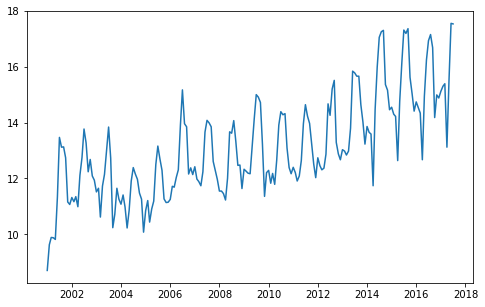

In [71]:
plt.plot(ts_Y)

### Feature TS Plot

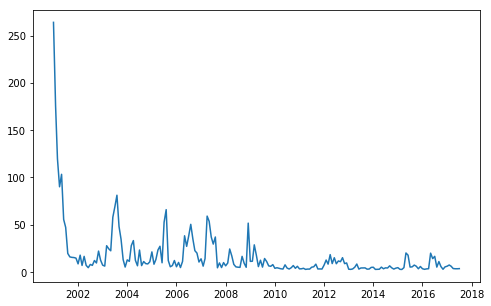

In [72]:
plt.plot(ts_f3) # GenCalifornia...petroleum.liquids.thousand.megawatthours

In [73]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
#Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
#Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
#Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [62]:
# f3+f6+f7+f8+f9+f10+f11+f12+f13+f18+f22+f33+f38+f39+f40+f44+f45+f54+f57+f68+f69+f70

In [75]:
# test_stationarity(ts_f3)

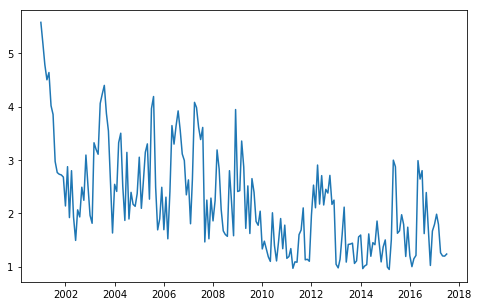

In [76]:
# take log
ts_f3_log = np.log(ts_f3)
plt.plot(ts_f3_log)

In [77]:
ts_f3.head()

,f3
Month,
2001-01-01,263.922
2001-02-01,175.649
2001-03-01,119.553
2001-04-01,90.016
2001-05-01,103.191


In [78]:
ts_f3_log.head()

,f3
Month,
2001-01-01,5.575654
2001-02-01,5.168488
2001-03-01,4.783760
2001-04-01,4.499987
2001-05-01,4.636582


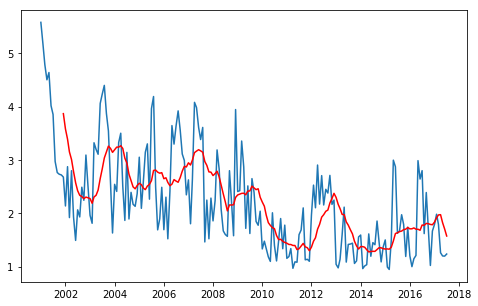

In [81]:
# Reduce the Trend
# Smoothing - take rolling average
moving_avg_f3 = pd.rolling_mean(ts_f3_log,12)
plt.plot(ts_f3_log)
plt.plot(moving_avg_f3, color='red')

In [82]:
ts_f3_log_moving_avg_diff = ts_f3_log - moving_avg_f3
ts_f3_log_moving_avg_diff.head(12)

,f3
Month,
2001-01-01,NaN
2001-02-01,NaN
2001-03-01,NaN
2001-04-01,NaN
2001-05-01,NaN
2001-06-01,NaN
2001-07-01,NaN
2001-08-01,NaN
2001-09-01,NaN


In [84]:
# drop nan
ts_f3_log_moving_avg_diff.dropna(inplace=True)

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

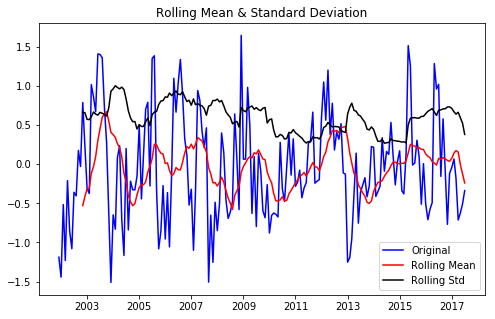

In [85]:
# test stationarity
test_stationarity(ts_f3_log_moving_avg_diff)

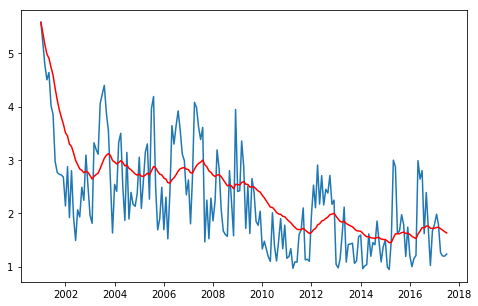

In [86]:
# Altnerative: exponentially weighted moving average
expwighted_avg_f3 = pd.ewma(ts_f3_log, halflife=12)
plt.plot(ts_f3_log)
plt.plot(expwighted_avg_f3, color='red')

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

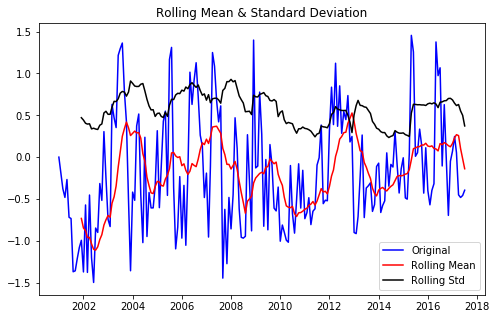

In [87]:
# Test Significance of stationary
ts_f3_log_ewma_diff = ts_f3_log - expwighted_avg_f3
test_stationarity(ts_f3_log_ewma_diff)

In [ ]:
# Eliminating Trend and Seasonality

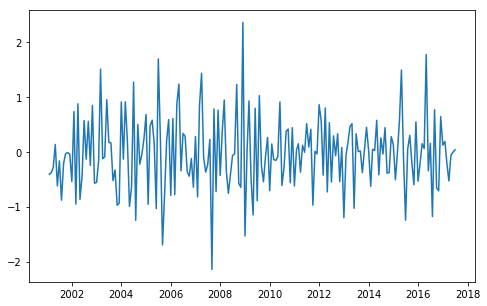

In [88]:
# 1. Differencing
ts_f3_log_diff = ts_f3_log - ts_f3_log.shift()
plt.plot(ts_f3_log_diff)

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

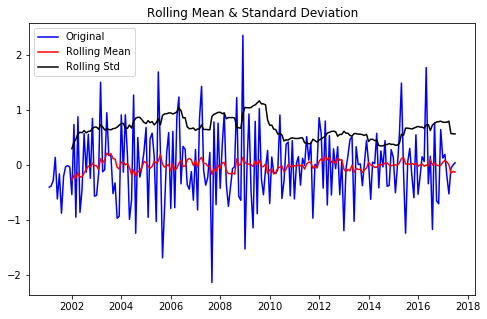

In [89]:
# Drop first 11 NaN
ts_f3_log_diff.dropna(inplace=True)
test_stationarity(ts_f3_log_diff)

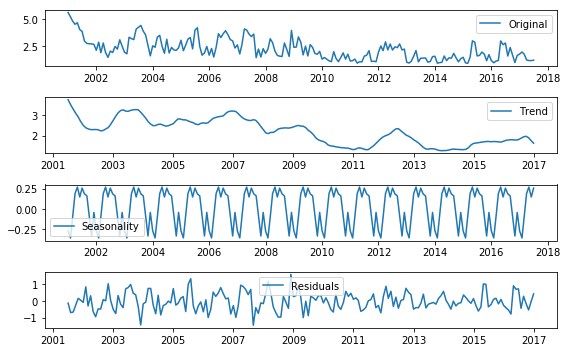

In [91]:
# 2.Decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_f3_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_f3_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

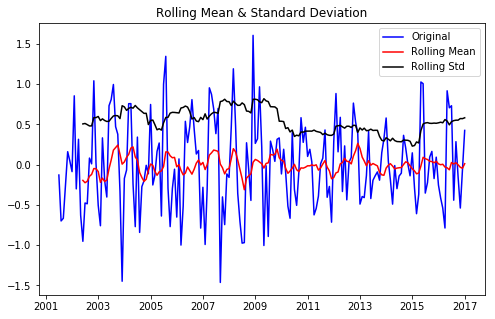

In [92]:
ts_f3_log_decompose = residual
ts_f3_log_decompose.dropna(inplace=True)
test_stationarity(ts_f3_log_decompose)

# Forecasting a Time Series

In [96]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [97]:
lag_acf_f3 = acf(ts_f3_log_diff, nlags=20)
lag_pacf_f3 = pacf(ts_f3_log_diff, nlags=20, method='ols')

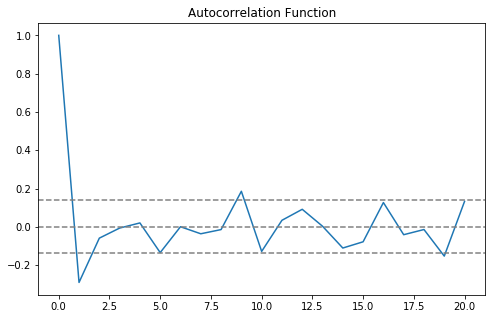

In [99]:
#Plot ACF: q=1
plt.subplot(111) 
plt.plot(lag_acf_f3)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_f3_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_f3_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

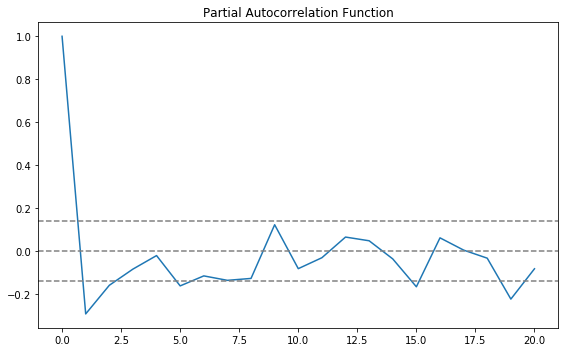

In [100]:
#Plot PACF: p = 1
plt.subplot(111)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_f3_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_f3_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [101]:
from statsmodels.tsa.arima_model import ARIMA

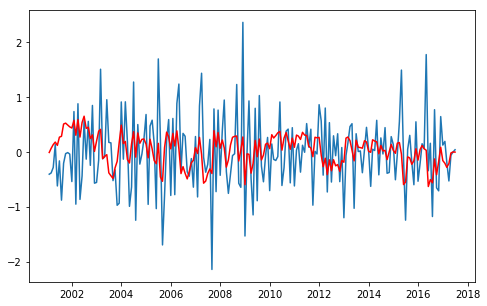

In [111]:
# ARIMA MODEL
model = ARIMA(ts_f3_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_f3_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_f3_log_diff)**2))

In [103]:
# Taking it back to original scale
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
2001-02-01   -0.010560
2001-03-01    0.063930
2001-04-01    0.133539
2001-05-01    0.179192
2001-06-01    0.118798
dtype: float64


In [104]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
2001-02-01   -0.010560
2001-03-01    0.053370
2001-04-01    0.186909
2001-05-01    0.366101
2001-06-01    0.484899
dtype: float64


In [107]:
predictions_ARIMA_log = pd.Series(ts_f3_log.ix[0], index=ts_f3_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
2001-01-01         NaN
2001-02-01   -0.010560
2001-03-01    0.053370
2001-04-01    0.186909
2001-05-01    0.366101
dtype: float64

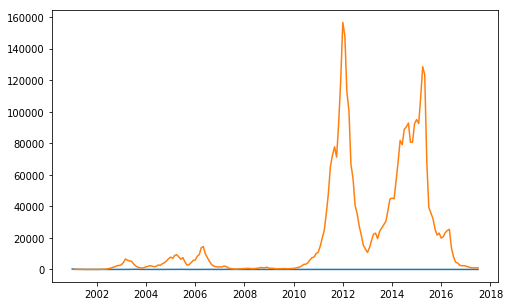

In [110]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts_f3)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts_f3)**2)/len(ts)))

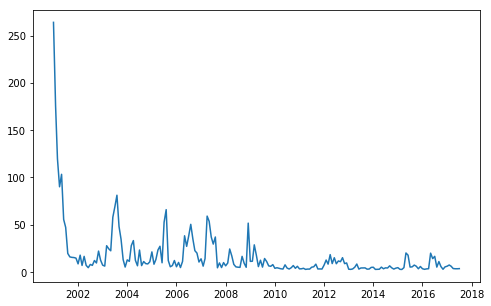

In [112]:
plt.plot(ts_f3)

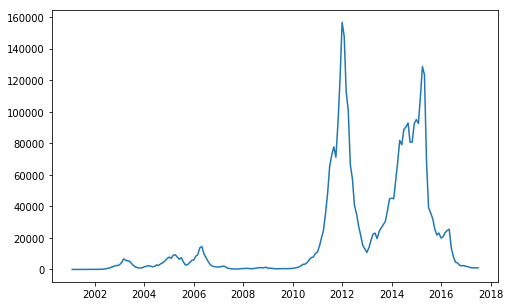

In [113]:
plt.plot(predictions_ARIMA)